<a href="https://colab.research.google.com/github/dbetteb/Design_Generation_GAN_Tensorflow/blob/main/TP_GANs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction aux GAN : génération de design mécaniques

Ce TP a pour objectif de se familiariser avec les briques élementaires des Réseaux Antagonistes Génératifs (_Generative Adversarial Networks_). Au début de ce notebook, on va revoir et jouer avec un simulateur de GAN similaire à Tensorflow Playground : [GAN lab](https://poloclub.github.io/ganlab/). Ensuite on présentera notre base de données qu'on va traiter aujourd'hui, c'est-à-dire un ensemble d'images répresentant des designs mécaniques. 

## Les GAN en bref 

### Les méthodes génératives 

Les Réseaux Antagonistes Génératifs sont une approche récente introduite par Ian Goodfellow (dans [1] alors chercheur à l'Université de Montréal) tirant parti des caractéristiques à la fois des approches génératives et discriminatives afin de générer des entrées similaire à un ensemble d'apprentissage de références. En soi, il s'agit d'une approche générative non supervisée car le premier objectif des GAN est de générer des entrées (appelée $X$) non labellisée "proches" (dans un sens à préciser) de la distribution d'un ensemble de référence d'apprentissage.  Les GAN en plus d'avoir été une des idées les plus novatrices du machine learning ces dernières années (Yan Le Cun directeur de l'IA chez Facebook les a qualifiées de "meilleure idée du machine learning de ces 10 dernièeres années" voir [ici](https://medium.com/thecyphy/gans-what-and-where-b377672283c5).

![](https://scx2.b-cdn.net/gfx/news/2018/5c1a01e78b2f1.jpg)


L'approche GAN a depuis son introduction en 2014 générée énormément d'intérêt de la part de la communauté machine learning et au-delà car elle repose sur une idée simple et permet a priori d'apprendre efficacement la distribution d'un ensemble d'apprentissage et de générer des exemples proches de ces derniers. Aussi, à la différence de nombreuses méthodes de machine learning aussi précises que les données d'entrées, les GAN offrent une sorte de créativité dans les exemples générés. L'exemple le plus marquant est l'utilisation de GAN sur des images (notamment de visages). Typiquement des GAN ont été utilisés par NVIDIA pour générer des visages à partir d'un ensemble de photos de visages existants et les visages générées ont atteint un niveau de réalisme impressionnant 

### Généralités sur les GAN

Comme le nom l'indique un GAN (ou Réseaux Antagonistes Génératifs) est globalement un modèle génératif. Son but est de générer des exemples $X$ proche d'une distribution de référence. Sa spécifité est à la fois de combiner $2$ modèles antagonistes, l'un génératif et l'autre discriminatif et de s'appuyer sur les récents succès de l'apprentissage profond. D'autres modèles génératifs ont récemment été développé, en exploitant les avancées de l'apprentissage profond, on trouve par exemple :

* les méthodes qui modèlisent explicitement les densités des ensembles d'apprentissage, soit de manière exacte (_Fully Visible Belief Nets_) ou de manière approchée (_Variational Autoencoder_ ou _Boltzmann machine_)
* les méthodes qui modélisent implicitement les densités et qui permettent d'échantillonner ces dernières, c'est le cas des approches de type chaînes de Markov (_Generative Stochastic Network_) et des approches directes dont font partie les GAN 

On retrouve donc, comme en inférence bayésienne (et en apprentissage par renforcement) la distinction très classique en machine learning entre méthodes à base de "modèle" (densité en l'occurence, type inférence variationnelle) et méthode "sans modèle" (à base d'échantillonnage de la densité qui n'est pas explicitement écrite type Monte Carlo Markov Chain). Par rapport aux autres modèles génératifs Goodfellow dans \cite{goodfellow2016nips} cite comme avantages des GAN les points suivants :

* possibilité de générer des **échantillons en parallèle**
* la fonction génératrice des GAN peut être **très versatile** (d'où aussi une **grande difficulté pratique à l'entraîner correctement**)
* pas d'**hypothèse de Markov** (pas de chaîne) 
* les GAN sont considérés comme **asymptotiquement convergent**
* enfin les résultats produits par les **GAN sont substantiellement et subjectivement supérieurs** aux autres modèles génératifs


Enfin, mentionnons que deux approches concurrentes génèrent beaucoup d'attention de la part de la communauté machine learning :

* Modèle de flow (*flow models*)
* Modèle autorégressifs (*autoregressive models*)

Les deux approches générent beaucoup d'attentes de la part de la communauté de recherche car ces méthodes pourraient pallier certains défauts des GAN (données mixtes notamment, entraînement plus facile), voir par exemple \cite{odena2019open}.

### Les différents types de GAN et leurs applications 

Un GAN est donc un modèle génératif composé de deux (parfois plus) modèles. L'approche tire parti des avantages à la fois des modèles discriminatifs et des modèles génératifs. En soi, la finalité d'un GAN est générative, son but est de générer des exemples proches des exemples d'apprentissage. Et pour y parvenir un GAN s'appuie sur un modèle discriminatif qui va permettre d'améliorer de proche en proche la qualité des exemples générés. L'analogie du GAN, fait dans l'article fondateur \cite{goodfellow2014generative} est celle des faux-monnayeurs et de la police. Les faux-monnayeurs génèrent des faux billets au début grossier qui se font rapidement détecter mais au fur et à mesure des retours, les faux-monnayeurs génèrent des billets de plus en plus réalistes jusqu'à tromper la police. Paradoxalement, la police permet indirectement aux faux-monnayeurs de s'améliorer en "mesurant" la qualité des faux billets via la comparaison avec les vrais billets. A convergence, plus personne ne sait distinguer les vrais des faux billets.

Correctement entraîné, un GAN peut générer des exemples très proches de ceux de la base d'apprentissage. Lors de son entraînement, un GAN va progressivement améliorer sa capacité de génération d'exemples en les soumettant à un classifieur qui a pour but de discriminer les "vrais" exemples (ceux de la base d'apprentissage) de ceux générés. La structure d'un GAN comporte donc toujours deux éléments 

* Un **générateur** qui apprend à générer des exemples. Ces exemples servent à l'apprentissage d'un discriminateur.
* Un **discriminateur** qui apprend à séparer les "vrais" exemples de ceux issus du générateurs. Les exemples "vrais" sont labellisés positivement et ceux issus du générateur négativement. Le discriminateur est un donc un classifieur classique.


![](https://sthalles.github.io/assets/dcgan/GANs.png)

Au début de l'entraînement, le générateur produit des exemples complètement aléatoires ("bruit blanc") et le discriminateur sépare aisément les faux exemples des vrais. Au fur et à mesure de l'entraînement, si ce dernier se déroule bien (ce qui dans le cas des GAN est souvent problématique) les exemples générés s'améliorent (autrement dit se rapprochent de la distribution des "vrais" exemples) et certains exemples peuvent tromper le discriminateur. Bien que cela ne soit pas nécessaire, chacune de ces briques est un réseau de neurones, c'est pour cette raison qu'on parle de Réseaux Antagonistes. Dans l'absolu, n'importe quel modèle génératif (resp. discriminatif) pourrait être le générateur (resp. le discriminateur), néanmoins la véritable innovation dans l'entraînement pratique des GAN proposé par Goodfellow est l'utilisation de la rétropropagation "croisée" entre le générateur et le discriminateur. En effet, le générateur apprend à améliorer ces exemples à l'aide du gradient du classifieur. C'est pour cette raison que les GAN ont pour composants de bases quasi-systématiquement des réseaux de neurones.



Par ailleurs parmi les applications principales des GAN dans la littérature, on retrouve largement en tête la génération d'images réalistes. Les progrès à la fois en terme d'architectures d'apprentissage profond dédiées image, d'algorithmes et de framework d'apprentissage et enfin la mise à disposition de nombreux datasets d'images judicieusement rassemblées (type CelebA pour les visages...) ont permis une accélération significative du réalisme des images générées par des GAN (et notamment les visages), en passant d'images peu précises avec divers défauts (effets de trame par exemple) à des images pouvant passer pour de vraies images en haute résolution en moins de 4 années, comme on peut le voir dans l'image suivante (la première ligne en haut correspond à l'année 2015 et la dernière en bas à l'année 2018) :

![](https://dudeperf3ct.github.io/images/gan/gan_progress.png)

Parmi les applications les plus impressionnantes citons aussi :

* le transfert de style ou de texture qui permet d'appliquer des filtres peu communs comme la transformation d'une vraie image de paysage en un tableau de peintre (Monet,  Van Gogh, Cezanne) représentant la même image. L'approche s'appelle CycleGAN.
* la génération d'images à très haute résolution. Certaines architectures de GAN sont en effet entraîner à générer des images de meilleures résolutions que celles en entrées. 

Enfin, citons aussi la récente application Zao qui réalise des _deepfakes_ ces fausses vidéos dans lesquelles sont incrustés de manière très réalistes des visages. La génération de telles vidéos s'appuie sur des GAN. Citons aussi finalement GANlab, ressource en ligne permettant d'entraîner des GAN **in the browser** qu'on va traiter dans la question 1.

## Quelques élements théoriques des GAN

### Vanilla GAN

Avant d'aller plus loin dans la description des GAN, précisons quelques notations. On appelle $D$ le mapping correspondant au discriminateur, c'est-à-dire la fonction qui à une entrée (vraie ou non) notée $x$ (typiquement ce peut être les valeurs de pixel d'une image RGB de taille $64 x 64$ auquel cas $x \in ([0,256]^{64 \times 64})^3$ et donc est de taille $3 \times 64 \times 64$) associe la probabilité (au sens d'un classifieur donc non calibrée) que $x$ soit une image réelle ou non. Ainsi, $D(x)$ devra être élevée si l'image est réelle et faible si l'image est fausse. Pour les images générées, on considère un espace dit latent de variable $z$ échantillonnée à partir d'une distribution gaussienne. On note $G$ le mapping entre cet espace latent et l'espace des sorties fausses (des images fausses), c'est notre fonction génératrice : $G(z)$ est donc une image. L'entraînement d'un GAN consiste donc à régler les paramètres de chacune de ces fonctions $D$ et $G$ de sorte que $G$ génère des sorties $G(z)$ proches de la disitribution des $x$ (entrées vraies) d'origine. Ainsi, intuitivement, on souhaite ainsi régler $D$ et $G$ tels que :

* $D$ soit un bon discriminateur sur les vraies images, c'est-à-dire identifie bien les vraies imagess. On cherche donc à maximiser $D(x)$ en moyenne pour des $x$ issues de la distribution d'entrées réelles. Soit \begin{equation}
        \max_{D} \mathbb{E}_{x \sim p_{data}(x)}D(x)
    \end{equation} 
* dans le même temps, on veut aussi que la probabilité que le discriminateur soit trompé par le générateur sur des images générées depuis l'espace latent $D(G(z))$ soit maximale. Car cela signifie que le discriminateur n'arrive plus à distinguer les vraies images de celles générées. Donc en moyenne, sur la distribution des variables latentes, on souhaite régler le générateur $G$ de telle sorte que la probabilité que $D$ se trompe soit la plus élévée (si en même temps $D$ est bon sur les vraies images), soit 
    \begin{equation}
        \max_{G} \mathbb{E}_{z \sim p_{z}(z)}D(G(z))
    \end{equation}
En définitive la fonction coût à optimiser lors de l'entraînement du GAN est donc simplement l'addition de ces deux objectifs :
\begin{equation}
    \max_{G}  \max_{D} = \mathbb{E}_{x \sim p_{data}(x)}D(x) + \mathbb{E}_{z \sim p_{z}(z)}D(G(z))
\end{equation}
pour des raisons à la fois pratiques et théoriques ce problème est transformé en :
\begin{equation}
    \min_{G}  \max_{D} = \mathbb{E}_{x \sim p_{data}(x)} \log{(D(x))} + \mathbb{E}_{z \sim p_{z}(z)}\log{(1-D(G(z)))}
\end{equation}
notamment, en prenant non pas la probabilité $D$ directement mais son logarithme plus stable numériquement (notamment pour les petites valeurs) comme dans le cas classique de l'apprentissage statistique fréquentiste où on cherche à maximiser la log vraisemblance plutôt que la vraisemblance. La transformation en $\min_G$ permet de transformer le problème d'apprentissage du GAN en un problème de min max. Pour ce type de problème, classique en théorie des jeux et en intelligence artificielle, on dispose à la fois de résultats théoriques et d'heuristiques pratiques pour la résolution. Du point de vue de la théorie des jeux, l'apprentissage d'un GAN peut être vu comme un jeu à somme nulle (les gains de l'un sont les perte de l'autre, comme les échecs ou le tarot) non coopératif. L'un des opposants a pour but de maximiser sa fonction d'utilité et l'autre opposant a pour but de la minimiser. A convergence d'un telle situation, on parle d'équilibre de Nash, caractérisé par le fait que chacun des opposants ne "gagne" plus (ne peut plus minimiser la fonction d'utilité de l'autre) à chercher à augmenter sa propre fonction d'utilité.

### Fonction de perte et entraînement 

Si on note $\theta_D$ (resp. $\theta_G$) les paramètres (internes, à régler lors de l'apprentissage, typiquement les poids des connections pour un réseau de neurones) du modèle discriminateur (resp. générateur), on note alors $V(\theta_D, \theta_G)$ :
\begin{equation}
    V(\theta_D, \theta_G) = \mathbb{E}_{x \sim p_{data}(x)} \log{(D(x;\theta_D))} + \mathbb{E}_{z \sim p_{z}(z)}\log{(1-D(G(z;\theta_G);\theta_D))}
\end{equation}
la fonction objective de l'entraînement du GAN. Et on alors :
\begin{eqnarray}
    \frac{\partial V(\theta_D, \theta_G)}{\partial \theta_D}  & = & \mathbb{E}_{x \sim p_{data}(x)}\Big[ \log{(D(x;\theta_D))} \Big] \\
      & = & \mathbb{E}_{x \sim p_{data}(x)}\Big[ \frac{\partial D(x;\theta_D)}{\partial \theta_D} \frac{1}{D(x;\theta_D)} \Big]+\mathbb{E}_{z \sim p_{z}(z)} \Big[ 
    -\frac{\partial D(G(z; \theta_G))}{\partial \theta_D}
    \frac{1}{1-D(G(z; \theta_G);\theta_D)} \Big]
\end{eqnarray}
et 
\begin{eqnarray}
    \frac{\partial V(\theta_D, \theta_G)}{\partial \theta_G} & = & 
    \mathbb{E}_{x \sim p_{data}(x)} \log{(D(x;\theta_D))} + \mathbb{E}_{z \sim p_{z}(z)}\log{(1-D(G(z;\theta_G);\theta_D))}
     \\
     & = & 
    \mathbb{E}_{z \sim p_{z}(z)} \Big[- \frac{\partial G(z;\theta_G)}{\partial \theta_G} \frac{\partial D(G(z;\theta_G);\theta_D)}{\partial \theta_D} \frac{1}{1-D(G(z; \theta_G);\theta_D)}
    \Big]
\end{eqnarray}
Où chacune des quantités $\frac{\partial D}{\partial \theta_D}$ et $\frac{\partial G}{\partial \theta_G}$ peut être calculée par rétro-propagation du gradient avec un framework classique adapté aux réseaux de neurones et l'espérance est classiquement approchée empiriquement :
\begin{equation}
    \mathbb{E}_{x \sim p_{data}(x)} \sim \frac{1}{m} \sum_{i = i}^m ...(x_i)...
\end{equation}

Les paramètres $\theta_G$ et $\theta_D$ sont aussi classiquement mis-à-jour par descente de gradient à pas adaptatif (avec éventuellement approche par lots (a.k.a _batch_) pour le calcul du gradient comme en apprentissage profond) adaptée au problème de minmax :
\begin{eqnarray}
   \theta_D^{(i+1)} & = & \theta_D{(i)}+\alpha_D \nabla_{\theta_D} V(\theta_D, \theta_G) \\
\end{eqnarray}
et
\begin{eqnarray}
   \theta_G^{(i+1)} & = & \theta_G{(i)}+\alpha_G \nabla_{\theta_D} V(\theta_D, \theta_G) \\
\end{eqnarray}

où $\alpha_D$ et $\alpha_G$ sont les taux d'apprentissage (souvent différents).

Si on suppose qu'on dispose d'une infinité de données et d'une capacité du discriminateur infinie (au sens de la dimension de Vapnik-Chervonenkis), on peut alors à chaque itération, théoriquement, déterminer un discriminateur optimal. Dans ce cas, on peut garantir l'existence et la convergence vers le générateur optimal.
De la même manière, pour un générateur $G$ donné, on peut montrer que le discriminateur optimal $D$ est la classifieur optimal de Bayes.

\begin{equation}
    D_G^\star(x) = \frac{p_{data}(x)}{p_{data}(x)+p_G(x)}
\end{equation}
Toujours en supposant qu'on dispose du discriminateur optimal (toujours à générateur $G$ fixé) :

\begin{equation}
    max_D V(D, G) = -\ln 4 + 2 D_{JS}(p_{data} || p_G)
\end{equation}

où $D_{JS}$ est la divergence de Jensen-Shannon.

\begin{equation}
    2 D_{JS}(p || q) = D_{KL}(p||q) + D_{KL}(q||p) 
\end{equation}
et on observe que le minimum (sur G) est obtenu avec 
\begin{equation}
    p_{data} = p_G
\end{equation}
et donc que le discriminateur optimal a une score de $1/2$. Ceci permet d'avoir un critère objectif de convergence.


### Deep Convolutional GAN

Suite à l'introduction des GAN par Goodfellow, la communauté machine learning a rapidement cherché à faire un pont entre les architectures profondes utilisées en traitement d'image et les GAN. En 2015, deux chercheurs publient \cite{radford2015unsupervised} où est présenté pour la première fois l'approche DCGAN Deep Convolutional Generative Adversarial Networks. Sa spécificité par rapport à un Vanilla GAN est donc d'utiliser des couches convolutives (similaires à celle des CNN) dans l'architecture du générateur mais à l'inverse des convolutions classiques en "up-scalant" l'image. Typiquement, l'architecture du générateur est celle décrite ci-dessous :

![](https://cdn-images-1.medium.com/max/1000/1*rdXKdyfNjorzP10ZA3yNmQ.png)

L'espace latent ($z$) est typiquement échantillonné via un modèle gaussien en dimension $100$ (ou au-delà). L'architecture convolutive (dite _up-convolutional_ ou _reverse recognition}=_) est composée :

* d'opérateur de **sur-échantillonnage** (_upsampling layers_) qui remplacent les couches classiques de _pooling_ par des opérateurs d'extrapolation (bilinéaire, plus proches voisins...).
* des couches dites de **faible résolution**
* des couches dites de **haute résolution**



## Question 1 : GAN lab


### Questions 

A l'instar de Tensorflow Playground, [GANlab](https://poloclub.github.io/ganlab/) est un outil *in-browser*  permettant d'entraîner des architectures simples de GAN sur des data sets 2d et d'observer en live l'entraînement du GAN. 

![](https://media.arxiv-vanity.com/render-output/3920740/figure-teaser.png)

- Jouer sur les taux d'apprentissage et observer les résultats. Que constatez-vous ?
- Que doit-on observer sur les métriques en cas de convergence ?

## Question 2 : Présentation du cas des designs mécaniques. Import des données , cohérence de la base



### Présentation générale 

Les données qu'on va traiter sont issues de recherches menées en ce moment (voir [](https://arxiv.org/abs/2010.11833)) avec l'ambition de faciliter le design mécanique à l'aide de techniques issues de l'apprentissage profond. En particulier, on s'intéresse à des modèles permettant de générer des designs mécaniques vus comme des images. Ces designs sont obtenus par des procédés propres au monde du design mécanique et permettent d'esquisser la forme optimale d'une pièce pour qu'elle supporte des charges. On dispose suite à ce travail d'une base de données de plusieurs milliers de design mécaniques représentés par des images en niveaux de gris où $0$ indique la présence de matière et $1$ l'absence. Pour importer les données, on commence par monter le compte github suivante



In [19]:
!git clone https://github.com/dbetteb/Design_Generation_GAN_Tensorflow.git

Cloning into 'Design_Generation_GAN_Tensorflow'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 25 (delta 10), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (25/25), done.


On se place dans le bon répertoire. Car  Google Colab n'importe pas directement l'arborescence du git :
```
│   create_dataset.py 
│   Design_Generation_GAN_tensorflow.ipynb 
│   discriminator.py
│   discriminator_2.py
│   generator.py
│   generator_2.py
│   README.md
│   train.zip
│   train_dcgan.ipynb
```
mais crée un dossier temporaire `content` dans lequel on va bien retrouver le contenu du repo github `Design_Generation_GAN_Tensorflow` mais aussi un répertoire `sample_data` qui contient des données génériques pour servir d'exemples à l'import de données dans un notebook Colab. On va donc se positionner dans le bon répertoire.

In [20]:
%cd Design_Generation_GAN_Tensorflow/
!ls

/content/Design_Generation_GAN_Tensorflow/Design_Generation_GAN_Tensorflow
create_dataset.py			generator_2.py	      TP5_enonce.ipynb
Design_Generation_GAN_tensorflow.ipynb	generator.py	      TP_GANs.ipynb
discriminator_2.py			README.md	      train_dcgan.ipynb
discriminator.py			TP5_correction.ipynb  train.zip


Les données sont dans une archive `.zip`, on va la dézipper directement dans le notebook.

In [21]:
!unzip train.zip

Archive:  train.zip
 extracting: train/design_2020-01-30 23_12_35_567__1.png  
  inflating: train/design_2020-01-30 23_12_44_398__1.png  
  inflating: train/design_2020-01-30 23_32_37_668__1.png  
 extracting: train/design_2020-01-30 23_34_26_822__1.png  
  inflating: train/design_2020-01-30 23_34_36_544__1.png  
 extracting: train/design_2020-01-30 23_38_50_916__1.png  
 extracting: train/design_2020-01-30 23_43_42_813__1.png  
 extracting: train/design_2020-01-30 23_54_48_218__1.png  
  inflating: train/design_2020-01-30 23_56_34_483__1.png  
  inflating: train/design_2020-01-31 08_08_51_971__1.png  
  inflating: train/design_2020-01-31 08_24_41_805__1.png  
  inflating: train/design_2020-01-31 08_30_40_089__1.png  
  inflating: train/design_2020-01-31 08_41_07_903__1.png  
 extracting: train/design_2020-01-31 08_47_59_988__1.png  
  inflating: train/design_2020-01-31 08_59_01_301__1.png  
 extracting: train/design_2020-01-31 09_03_40_167__1.png  
 extracting: train/design_2020-01-31

### Questions 

Avant tout entraînement de GAN, nous allons estimer la dispersion des données d’entrées et s’assurer que les différent design restent cohérents. 

* De combien de design dispose-t-on ? 
* Superposer sur un même graphique différents design.  
* Chaque design a un certain niveau de matière (nombre de pixels de valeurs 1). Tracer l’histogramme de ce niveau de matière sur tous les design. 
* Quelle est votre conclusion sur la cohérence des design ?

### Import des images

In [17]:
import tensorflow as tf
import os
import time
from IPython import display
import matplotlib.pyplot as plt
import numpy as np
from create_dataset import load_data

On charge les données

In [22]:
ROOT_PATH = "./"
train_data_directory = os.path.join(ROOT_PATH, "train/")
images_train = load_data(train_data_directory)

On en profite pour créer le dataloader de tensorflow permettant de charger les images par batch

In [23]:
BATCH_SIZE = 32
train_dataset = tf.data.Dataset.from_tensor_slices(images_train).shuffle(5000).batch(BATCH_SIZE)

### Nombre de design 

Evaluer le nombre d'images, la taille des images et le nombre de channel.

In [24]:
images_train.shape

(3885, 50, 50, 1)

On trace un design au hasard

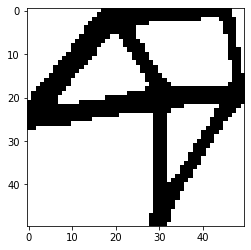

In [25]:
plt.imshow(images_train[948, :, :, 0], cmap='gray')

### Tracés de plusieurs design

On utilise `subplot`

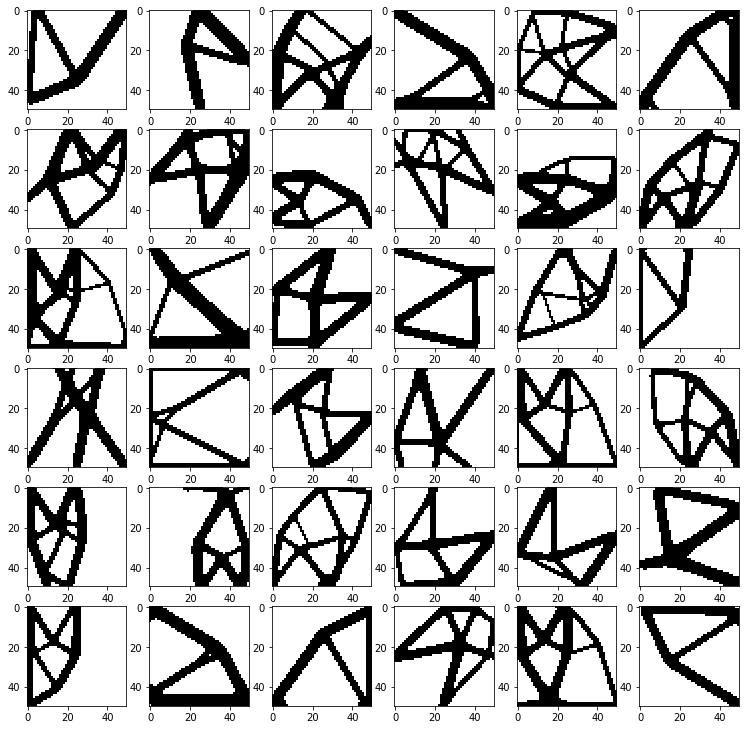

In [26]:
def gen_index(nmax):
  return np.random.randint(1,nmax)

plt.figure(figsize=[15,15])  # create a plot figure
nside = 6
# create the first of two panels and set current axis
for i in range(1,nside+1):
  for j in range(1,nside+1):
      plt.subplot(nside+1, nside+1, (nside+1)*(i-1)+j) # (rows, columns, panel number)
      plt.imshow(images_train[gen_index(3885), :, :, 0], cmap='gray')

### Calcul de la dispersion du taux de matière 

On commence par créer une fonction qui calcule pour une image le taux de matière

In [27]:
def MatterRate(image_index=1):
  return (2500.-np.sum(images_train[image_index, :, :, 0]))/2500.

Rates = []
for i in range(1,3885):
  Rates.append(MatterRate(i))

On utilise ensuite la fonction `hist`.

Text(0.5, 1.0, 'Dispersion du taux de matière')

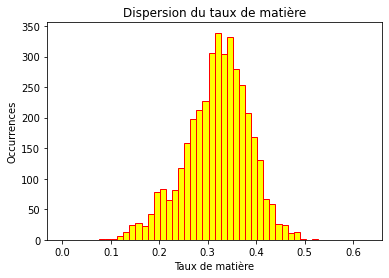

In [28]:
plt.hist(Rates, range = (0., 1.2*np.max(Rates)), bins = 50, color = 'yellow',
            edgecolor = 'red')
plt.xlabel('Taux de matière')
plt.ylabel('Occurrences')
plt.title('Dispersion du taux de matière')

### Conclusion sur la cohérence des données

La base comprend 3885 design mecaniques. Ces designs correspondent à des structures élancées et comprennent tous un certain nombre de barres assez fines. Néanmoins, certains design ont plus de matière que d'autres et les designs n'ont d'orientation propre (contrairement par exemple à la base MNIST où les chiffres ont une orientation donnée). Bien qu'on observe une distribution assez simple de la matière, on peut s'attendre à une grande diversité de design et donc à une relative complexité de la tâche de génération.